In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=30

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "plantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2154 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 2 0]


In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


In [72]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[214. 209. 206.]
  [214. 209. 206.]
  [213. 208. 205.]
  ...
  [233. 229. 230.]
  [231. 227. 228.]
  [230. 226. 227.]]

 [[211. 206. 203.]
  [211. 206. 203.]
  [210. 205. 202.]
  ...
  [228. 224. 225.]
  [226. 222. 223.]
  [226. 222. 223.]]

 [[212. 207. 204.]
  [211. 206. 203.]
  [210. 205. 202.]
  ...
  [223. 219. 220.]
  [221. 217. 218.]
  [221. 217. 218.]]

 ...

 [[184. 174. 173.]
  [187. 177. 176.]
  [189. 179. 178.]
  ...
  [191. 182. 185.]
  [189. 180. 183.]
  [186. 177. 180.]]

 [[179. 169. 168.]
  [180. 170. 169.]
  [181. 171. 170.]
  ...
  [188. 179. 182.]
  [185. 176. 179.]
  [189. 180. 183.]]

 [[185. 175. 174.]
  [181. 171. 170.]
  [180. 170. 169.]
  ...
  [184. 175. 178.]
  [181. 172. 175.]
  [188. 179. 182.]]]


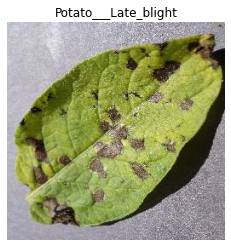

In [73]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[2]])
    plt.axis("off")

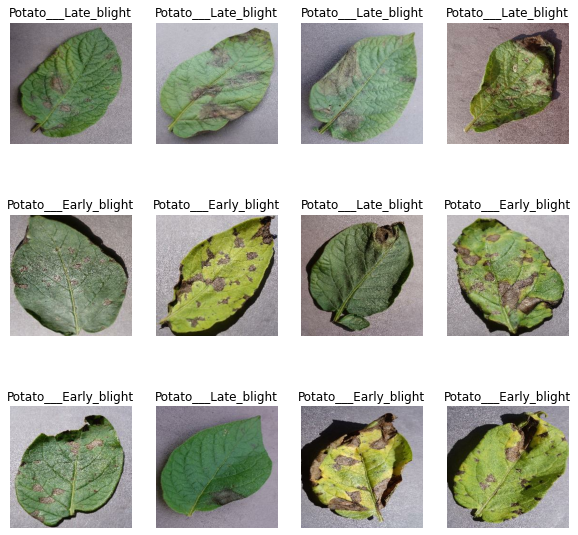

In [74]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [75]:
len(dataset)

68

In [76]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [77]:
train_ds = dataset.take(54)

In [78]:
test_ds=dataset.skip(54) #[:54]
len(test_ds)

14

In [79]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [80]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [81]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [12]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [13]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)

54

In [15]:
len(val_ds)

6

In [16]:
len(test_ds)

8

In [17]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [88]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [89]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomContrast(factor=0.2),
    layers.experimental.preprocessing.RandomZoom(0.2)])

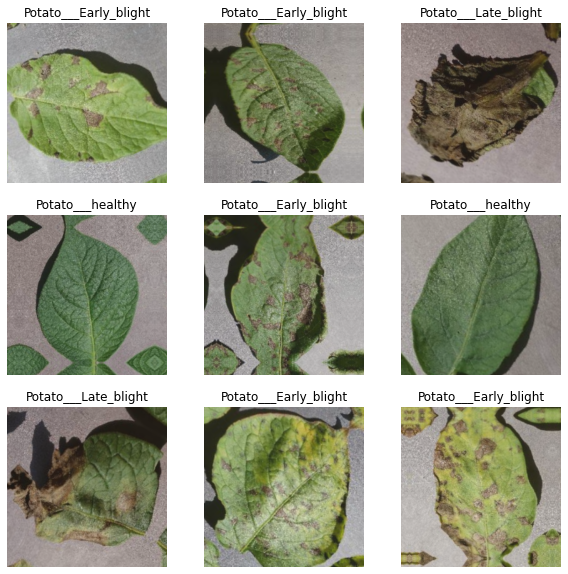

In [90]:
# Apply data augmentation to an image batch
for image_batch, label_batch in dataset.take(1):
    augmented_images = data_augmentation(image_batch)
    
    plt.figure(figsize=(10, 10))
    
    for i in range(9):  # Display the first 9 augmented images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    
    plt.show()

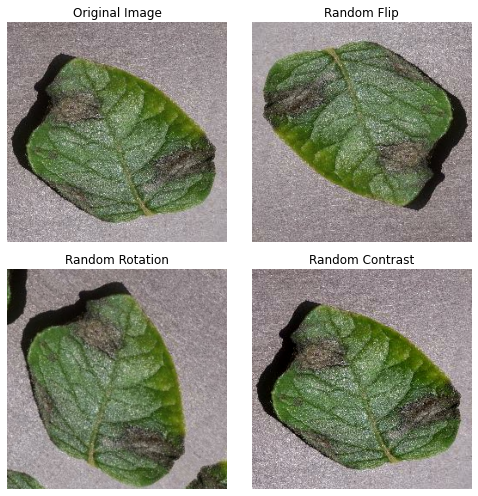

In [91]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

# Assuming you have your dataset and class_names defined

# Load a single batch of images and labels from the dataset
for image_batch, label_batch in dataset.take(1):
    # Choose a single image from the batch
    image = image_batch[0]

    # Create a figure with subplots to display augmented images
    plt.figure(figsize=(7, 7))
    plt.subplot(2, 2, 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title("Original Image")
    plt.axis("off")

    # Apply data augmentation: Random Flip
    flip_augmented = layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")(image)
    plt.subplot(2, 2, 2)
    plt.imshow(flip_augmented.numpy().astype("uint8"))
    plt.title("Random Flip")
    plt.axis("off")

    # Apply data augmentation: Random Rotation
    rotation_augmented = layers.experimental.preprocessing.RandomRotation(0.2)(image)
    plt.subplot(2, 2, 3)
    plt.imshow(rotation_augmented.numpy().astype("uint8"))
    plt.title("Random Rotation")
    plt.axis("off")

    # Apply data augmentation: Random Contrast
    contrast_augmented = layers.experimental.preprocessing.RandomContrast(factor=0.2)(image)
    plt.subplot(2, 2, 4)
    plt.imshow(contrast_augmented.numpy().astype("uint8"))
    plt.title("Random Contrast")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

In [92]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [94]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['acc'],
)

In [95]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
54/54 [==============================] - 137s 2s/step - loss: 0.9434 - acc: 0.4890 - val_loss: 0.8435 - val_acc: 0.6146
Epoch 2/30
54/54 [==============================] - 124s 2s/step - loss: 0.7311 - acc: 0.6493 - val_loss: 0.5572 - val_acc: 0.7396
Epoch 3/30
54/54 [==============================] - 119s 2s/step - loss: 0.5395 - acc: 0.7622 - val_loss: 0.3566 - val_acc: 0.8438
Epoch 4/30
54/54 [==============================] - 120s 2s/step - loss: 0.4647 - acc: 0.7917 - val_loss: 0.3377 - val_acc: 0.8438
Epoch 5/30
54/54 [==============================] - 120s 2s/step - loss: 0.3737 - acc: 0.8443 - val_loss: 0.3622 - val_acc: 0.8490
Epoch 6/30
54/54 [==============================] - 241s 5s/step - loss: 0.3457 - acc: 0.8588 - val_loss: 0.2625 - val_acc: 0.8906
Epoch 7/30
54/54 [==============================] - 120s 2s/step - loss: 0.3015 - acc: 0.8848 - val_loss: 0.2010 - val_acc: 0.9167
Epoch 8/30
54/54 [==============================] - 128s 2s/step - loss: 0.2654 - a

In [96]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 5s 346ms/step - loss: 0.2149 - acc: 0.9453


In [97]:
scores

[0.2149491310119629, 0.9453125]

In [98]:
history

In [99]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [100]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [101]:
acc=history.history['acc']
val_acc=history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

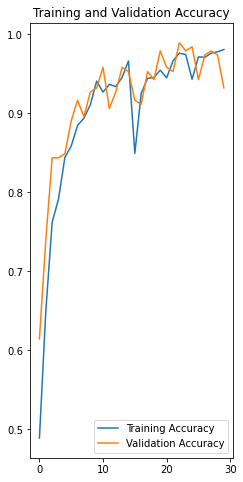

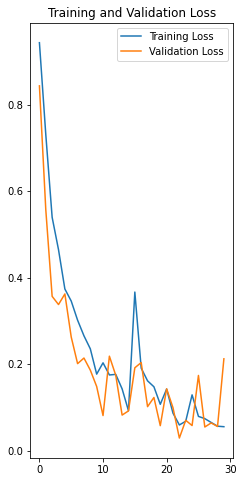

In [102]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
first image's actual label: Potato___Late_blight
1/1 [==============================] - 1s 716ms/step
Potato___Late_blight


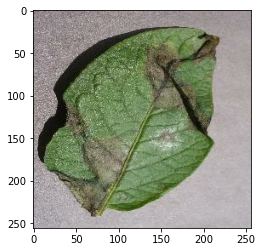

In [18]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print(class_names[np.argmax(batch_prediction[0])])

In [104]:
print(np.argmax(batch_prediction[0]))

1


In [10]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    print(predictions)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 140ms/step
[[5.6851550e-05 8.2617140e-01 1.7377175e-01 3.6192652e-08]]
1/1 [==============================] - 0s 34ms/step
[[9.9999845e-01 1.5122927e-06 6.0950409e-13 3.0966942e-15]]
1/1 [==============================] - 0s 41ms/step
[[3.2413861e-13 1.2757551e-03 9.9872428e-01 8.4147140e-18]]
1/1 [==============================] - 0s 46ms/step
[[9.9995887e-01 4.1139167e-05 1.1751541e-10 3.7983635e-12]]
1/1 [==============================] - 0s 43ms/step
[[1.0000000e+00 1.2233619e-08 1.4202120e-17 3.8074991e-20]]
1/1 [==============================] - 0s 43ms/step
[[8.2897174e-04 9.9916971e-01 1.3826910e-06 1.4812724e-11]]
1/1 [==============================] - 0s 40ms/step
[[9.9999809e-01 1.9655283e-06 1.0892869e-12 7.2608732e-15]]
1/1 [==============================] - 0s 35ms/step
[[9.9973315e-01 2.6682438e-04 8.1735968e-10 2.3190456e-12]]
1/1 [==============================] - 0s 32ms/step
[[5.8634678e-06 7.0344672e-02 9.2964935e-01 1.19511

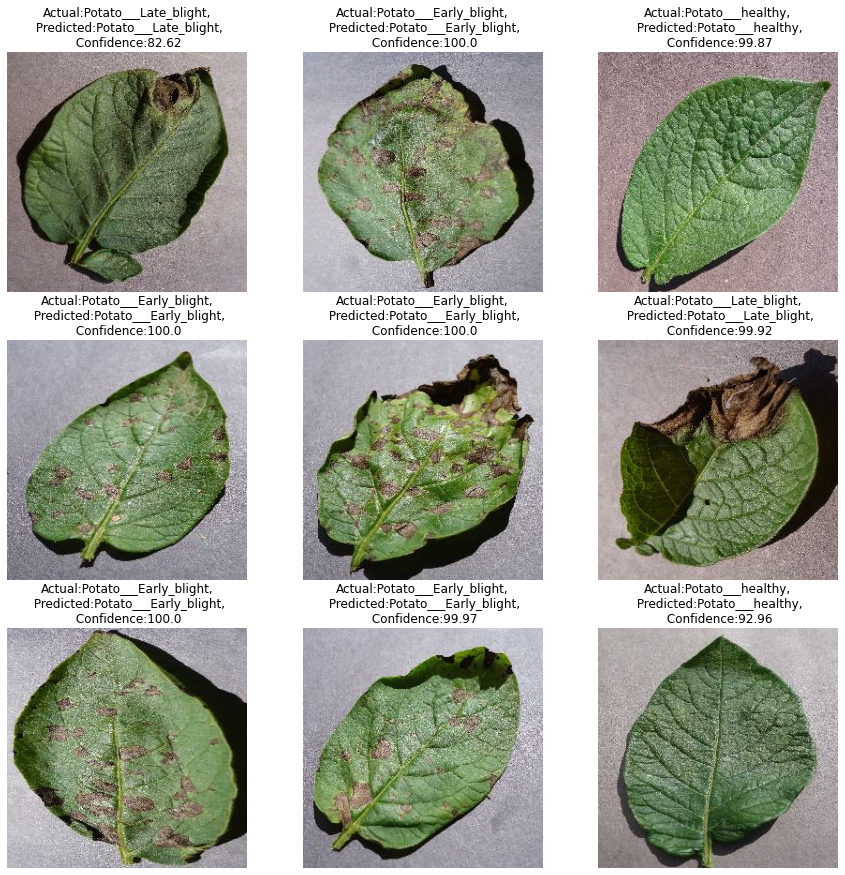

In [106]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class},\n Confidence:{confidence}")
        plt.axis("off")

In [107]:
model.save("simplemodel.h5")

In [8]:
from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# load model
model = load_model('simplemodel.h5')
# summarize model.
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

1/1 [==============================] - 0s 344ms/step


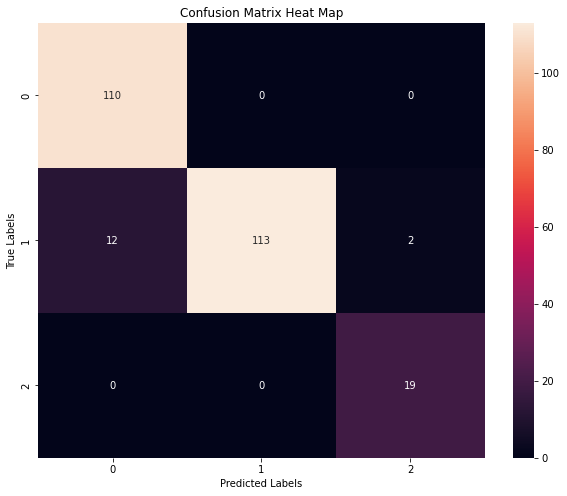

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

# Assuming you have a trained model 'model' and a test dataset 'test_ds'
true_labels = []
predicted_labels = []

for image_batch, label_batch in test_ds:
    predictions = model.predict(image_batch)
    predicted_labels.extend(np.argmax(predictions, axis=-1))
    true_labels.append(label_batch.numpy())

true_labels = np.concatenate(true_labels)  # Convert the list to a NumPy array
predicted_labels = np.array(predicted_labels)

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heat Map')
plt.show()


In [111]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       110
           1       1.00      0.89      0.94       127
           2       0.90      1.00      0.95        19

    accuracy                           0.95       256
   macro avg       0.94      0.96      0.95       256
weighted avg       0.95      0.95      0.95       256



1/1 [==============================] - 0s 405ms/step
Unique true labels: [0 1 2]
Unique predicted labels: [0 1 2]


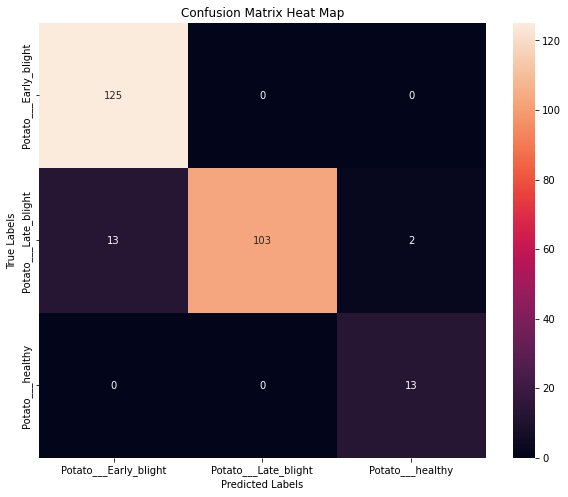

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have a trained model 'model' and datasets 'train_ds', 'val_ds', 'test_ds'
true_labels = []
predicted_labels = []

for image_batch, label_batch in test_ds:
    predictions = model.predict(image_batch)
    predicted_labels.extend(np.argmax(predictions, axis=-1))
    true_labels.extend(label_batch.numpy().astype(int))

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

print("Unique true labels:", np.unique(true_labels))
print("Unique predicted labels:", np.unique(predicted_labels))

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heat Map')
plt.show()
